In [ ]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
drive.mount("/content/drive/")

path = '/content/drive/MyDrive/Data Mining Assignment/english only data_base.csv'
#import os
#os.chdir("/content/drive/")
#!ls

#Load the data
df=pd.read_csv(path, lineterminator='\n')

#View the data
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Category_Title,country,trend_year,trend_month,language
0,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14T22:39:13Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,2020-11-21 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...,Music,US,2020,11,en
1,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-15 00:00:00+00:00,[None],0,22585,...,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...,Education,US,2021,8,en
2,G1mi7J-VtHk,Committal Service for Her Majesty The Queen,2022-09-19T16:03:18Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-23 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/G1mi7J-VtHk/default.jpg,True,True,"Live stream of service at St George’s Chapel, ...",People & Blogs,GB,2022,9,en
3,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25T01:40:31Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-29 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4420,...,261,https://i.ytimg.com/vi/r7nYQXsxJdU/default.jpg,False,False,HBCU Homecoming 2020 is going down! We welcome...,Entertainment,US,2020,10,en
4,8fPKj1aySB4,The Queen’s children hold a Vigil in Edinburgh,2022-09-12T19:01:28Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-18 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/8fPKj1aySB4/default.jpg,True,True,"Watch live as The King, The Princess Royal, Th...",People & Blogs,GB,2022,9,en


###3

In [ ]:
#test = df[['likes']].mean()
#test.boxplot(notch=True, patch_artist=True, showmeans=True, meanline=True)

<Axes: >

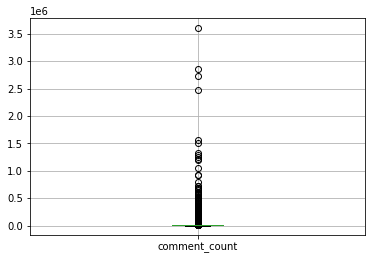

In [ ]:
df[['comment_count']].boxplot()

<Axes: >

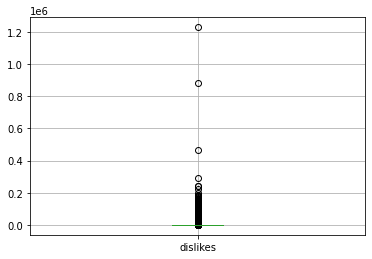

In [ ]:
df[['dislikes']].boxplot()

<Axes: >

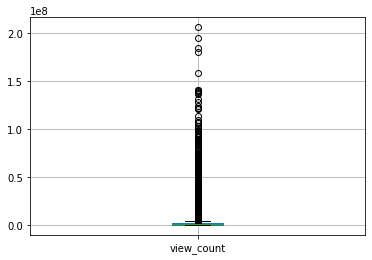

In [ ]:
df[['view_count']].boxplot()

<Axes: >

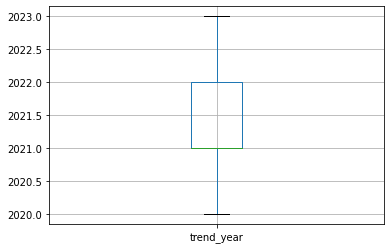

In [ ]:
df[['trend_year']].boxplot()

<Axes: >

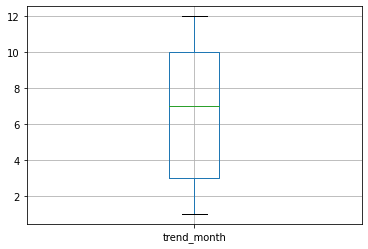

In [ ]:
df[['trend_month']].boxplot()

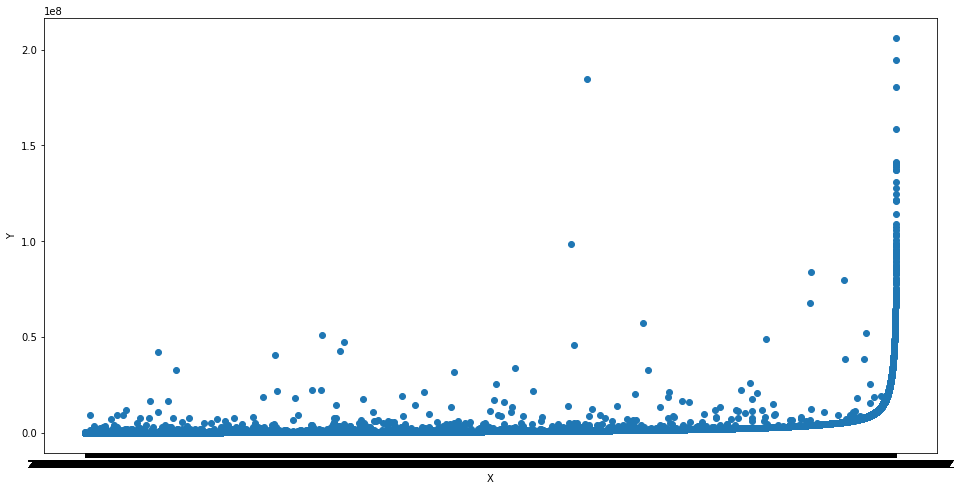

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['publishedAt'] , df['view_count'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

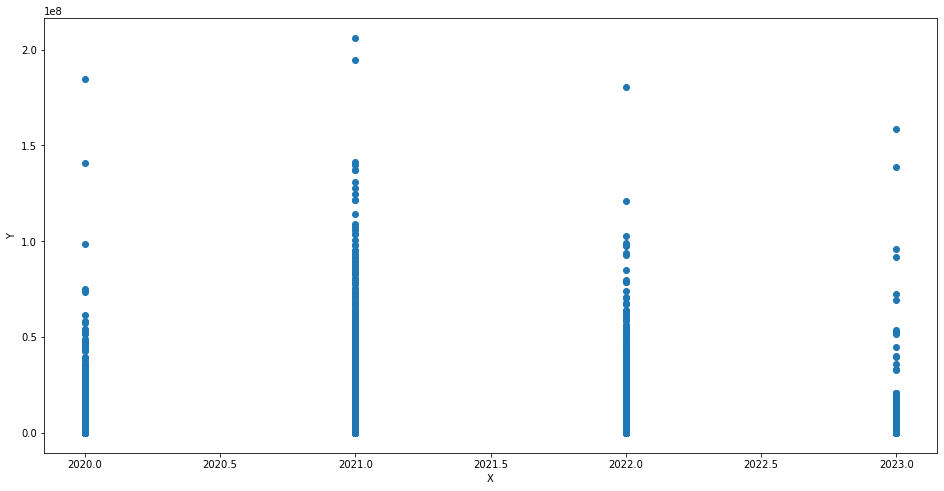

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['trend_year'] , df['view_count'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

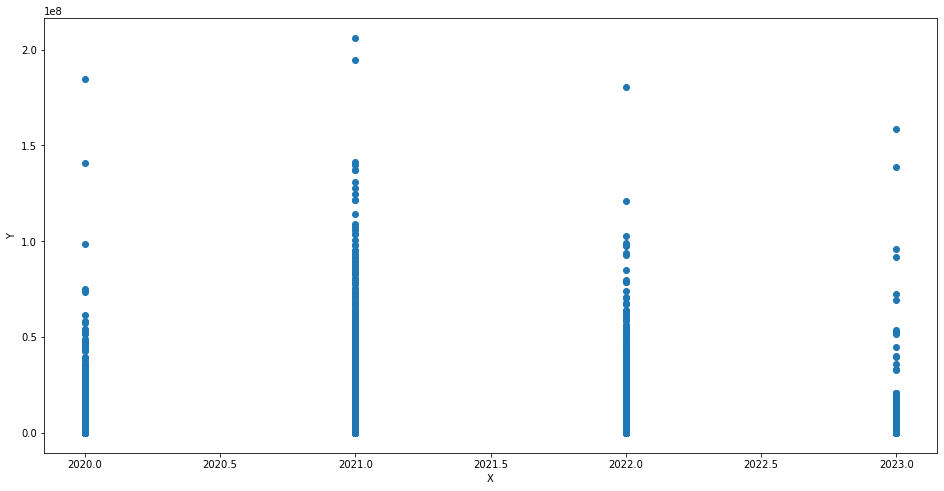

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['trend_year'] , df['view_count'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73736 entries, 0 to 73735
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           73736 non-null  object
 1   title              73736 non-null  object
 2   publishedAt        73736 non-null  object
 3   channelId          73736 non-null  object
 4   channelTitle       73736 non-null  object
 5   categoryId         73736 non-null  int64 
 6   trending_date      73736 non-null  object
 7   tags               73736 non-null  object
 8   view_count         73736 non-null  int64 
 9   likes              73736 non-null  int64 
 10  dislikes           73736 non-null  int64 
 11  comment_count      73736 non-null  int64 
 12  thumbnail_link     73736 non-null  object
 13  comments_disabled  73736 non-null  bool  
 14  ratings_disabled   73736 non-null  bool  
 15  description        70445 non-null  object
 16  Category_Title     73711 non-null  objec

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.likes.value_counts()

0          509
9191         8
2284         8
11306        8
9307         7
          ... 
8825         1
25136        1
20576        1
79667        1
6840430      1
Name: likes, Length: 54750, dtype: int64

In [ ]:
df.likes.describe()

count    7.373600e+04
mean     1.015532e+05
std      2.688139e+05
min      0.000000e+00
25%      1.242100e+04
50%      3.317350e+04
75%      9.013100e+04
max      1.179567e+07
Name: likes, dtype: float64

In [ ]:
df.view_count.describe().apply(lambda x: format(x, 'f'))

count        73736.000000
mean       2082640.979983
std        5303695.586625
min              0.000000
25%         383820.750000
50%         834033.500000
75%        1942521.250000
max      206202284.000000
Name: view_count, dtype: object

<Axes: ylabel='Density'>

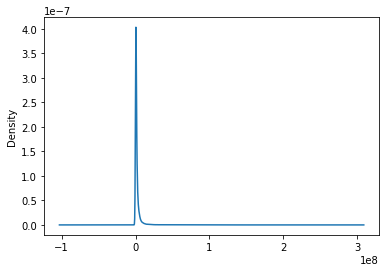

In [ ]:
df.view_count.plot(kind='kde')

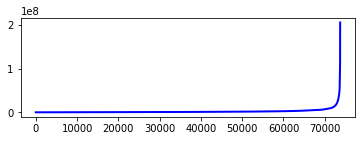

In [ ]:
# Library Import(numpy and matplotlib)
 
import pylab
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(df.view_count, color='blue', lw=2)

ax.set_yscale('linear')
ax.set_xscale('linear')
pylab.show()

###1

In [ ]:

#sns.catplot(x="title", y="likes", data=df, kind="box", aspect=1.5)
#plt.title("Boxplot")
#plt.show()

###5

In [ ]:
df.groupby(['Category_Title','likes']).size()

Category_Title    likes  
Autos & Vehicles  0          7
                  17         1
                  21         1
                  350        1
                  525        1
                            ..
Travel & Events   722555     1
                  886623     1
                  918063     1
                  986055     1
                  1052894    1
Length: 69032, dtype: int64

In [ ]:
df.groupby('likes').quantile(.5)

<ipython-input-22-48bd316a3f8f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df.groupby('likes').quantile(.5)


,categoryId,view_count,dislikes,comment_count,comments_disabled,ratings_disabled,trend_year,trend_month
likes,,,,,,,,
0,22.0,540981.0,0.0,393.0,0.0,1.0,2021.0,9.0
2,22.0,36389.0,0.0,5.0,0.0,0.0,2022.0,10.0
14,27.0,1057436.0,0.0,0.0,1.0,0.0,2022.0,6.0
15,24.0,1165644.0,0.0,12.0,0.0,0.0,2021.0,2.0
17,2.0,2253998.0,7.0,12.0,0.0,0.0,2021.0,2.0
...,...,...,...,...,...,...,...,...
8438151,10.0,180654898.0,0.0,1326586.0,0.0,0.0,2022.0,10.0
9217879,10.0,140685439.0,127310.0,1507562.0,0.0,0.0,2020.0,10.0
9444379,10.0,93952431.0,0.0,2469783.0,0.0,0.0,2022.0,6.0


In [ ]:
df.groupby('Category_Title')['video_id'].count()

NameError: ignored

In [ ]:
# Get Frequency of multiple columns
print( df[['video_id','title','publishedAt','channelId','channelTitle','categoryId','trending_date','tags','view_count','likes','comment_count','Category_Title','country','trend_year','trend_month','language']].value_counts())


video_id     title                                                                                            publishedAt           channelId                 channelTitle                        categoryId  trending_date              tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                      view_count  likes   comment_count  Category_Title        country  trend_year  trend_month  language
#NAME?       I Was Robbed                                                                                     2023-02-28T19:28:41Z  UCjK0F1DopxQ5U0sCwOlXwOg  Mogul Mail                          22          202

In [ ]:
print( df[['channelTitle','tags','Category_Title','trend_year','trend_month']].value_counts())

channelTitle      tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Category_Title  trend_year  trend_month
Vijay Television  biggboss|tamil|vijay television|starvijay|Ulaganayagan|தமிழ்|விஜய் டிவி|தொலைக்காட்சி|Tamil TV|Tamil Shows|Redefining Entertainment|Star|Star Vijay TV|Vijay TV|hotstar|Kamal Haasan|Bigg Boss|Bigg Boss Tamil 4|பிக்பாஸ்|பிக்பாஸ் 4|Bigg Boss Season 4|Teaser                                                                                                                                                                                                         Entertainment   

In [ ]:
print( df[['title','publishedAt','trend_year','trend_month']].value_counts())

title                                                                                publishedAt           trend_year  trend_month
Cobra Kai: Season 5 | Official Trailer | Netflix                                     2022-08-16T16:00:03Z  2022        8              2
FINAL FANTASY XIV: ENDWALKER Launch Trailer                                          2021-11-06T02:34:38Z  2021        11             2
Harry & Meghan | Official Teaser | Netflix                                           2022-12-01T12:05:00Z  2022        12             2
 20 WEDS 30  | EP1 | Mini Web Series | Comedy | Ponmutta (With English subtitles)    2021-08-20T11:29:53Z  2021        8              1
Prince Philip dies: Queen faces a future without her ‘strength and stay’ | ITV News  2021-04-09T13:15:04Z  2021        4              1
                                                                                                                                     ..
HOW TO MAKE AMAZING HOT COCOA BOMBS!                 

###4

In [ ]:
s = df[['Category_Title','publishedAt','trend_year','trend_month']].value_counts()
s.rcParams["figure.figsize"] = (16, 10)
s.plot(kind='bar')

AttributeError: ignored

In [ ]:
likesdf = df.groupby('Category_Title')['likes'].agg('sum')

In [ ]:
dislikesdf = df.groupby('Category_Title')['dislikes'].agg('sum')

In [ ]:
ratiodf = likesdf/dislikesdf 

In [ ]:
ratiodf = ratiodf.sort_values(ascending=False).reset_index()

<Axes: xlabel='ratio', ylabel='Category_Title'>

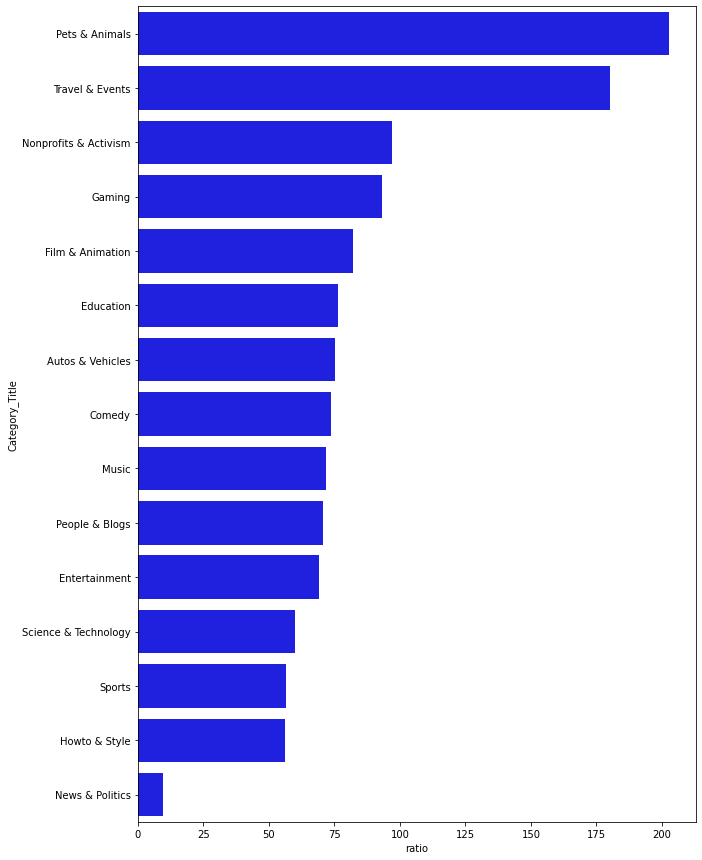

In [ ]:
likesdf = df.groupby('Category_Title')['likes'].agg('sum')
dislikesdf = df.groupby('Category_Title')['dislikes'].agg('sum')

ratiodf = likesdf/dislikesdf 
ratiodf = ratiodf.sort_values(ascending=False).reset_index()

ratiodf.columns = ['Category_Title','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="Category_Title", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Category_Title,country,trend_year,trend_month,language
0,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14T22:39:13Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,2020-11-21 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...,Music,US,2020,11,en
1,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-15 00:00:00+00:00,[None],0,22585,...,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...,Education,US,2021,8,en
2,G1mi7J-VtHk,Committal Service for Her Majesty The Queen,2022-09-19T16:03:18Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-23 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/G1mi7J-VtHk/default.jpg,True,True,"Live stream of service at St George’s Chapel, ...",People & Blogs,GB,2022,9,en
3,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25T01:40:31Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-29 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4420,...,261,https://i.ytimg.com/vi/r7nYQXsxJdU/default.jpg,False,False,HBCU Homecoming 2020 is going down! We welcome...,Entertainment,US,2020,10,en
4,8fPKj1aySB4,The Queen’s children hold a Vigil in Edinburgh,2022-09-12T19:01:28Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-18 00:00:00+00:00,[None],0,0,...,0,https://i.ytimg.com/vi/8fPKj1aySB4/default.jpg,True,True,"Watch live as The King, The Princess Royal, Th...",People & Blogs,GB,2022,9,en


###Y variable - to log

In [ ]:
df.view_count.describe().apply(lambda x: format(x, 'f'))

count        73736.000000
mean       2082640.979983
std        5303695.586625
min              0.000000
25%         383820.750000
50%         834033.500000
75%        1942521.250000
max      206202284.000000
Name: view_count, dtype: object

In [ ]:
df.view_count.describe().apply(lambda x: format(x, 'g'))

count          73736
mean     2.08264e+06
std       5.3037e+06
min                0
25%           383821
50%           834034
75%      1.94252e+06
max      2.06202e+08
Name: view_count, dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


(array([  143.,  2073.,  9671., 20614., 21369., 13243.,  4940.,  1233.,
          377.,    53.]),
 array([4.19917903, 4.61069047, 5.02220192, 5.43371336, 5.8452248 ,
        6.25673625, 6.66824769, 7.07975914, 7.49127058, 7.90278203,
        8.31429347]),
 [<matplotlib.patches.Polygon at 0x7fa344e27340>])

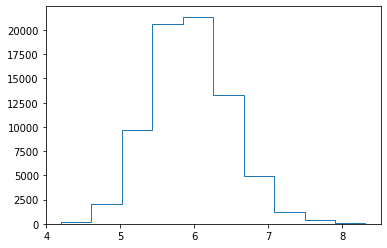

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['view_count'] = df['view_count'].astype('float64')
data = pd.DataFrame(df, columns = ['view_count'])

# Show the dataframe
#df['view_count'] = df['view_count'].astype('float64')
data_log_10 = np.log10(data)
data_log_10.replace([np.inf, -np.inf], np.nan, inplace=True)

data_log_2 = np.log2(data)
data_log_2.replace([np.inf, -np.inf], np.nan, inplace=True)

data_log_e = np.log(data)
data_log_e.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.hist(data_log_10, histtype='step', log=False)

In [ ]:
t=data[data['view_count']>0]

data_test = np.log10(t['view_count'])
#data.replace([np.inf, -np.inf], np.nan, inplace=True)

(array([  143.,  2073.,  9671., 20614., 21369., 13243.,  4940.,  1233.,
          377.,    53.]),
 array([4.19917903, 4.61069047, 5.02220192, 5.43371336, 5.8452248 ,
        6.25673625, 6.66824769, 7.07975914, 7.49127058, 7.90278203,
        8.31429347]),
 [<matplotlib.patches.Polygon at 0x7fa339abf5b0>])

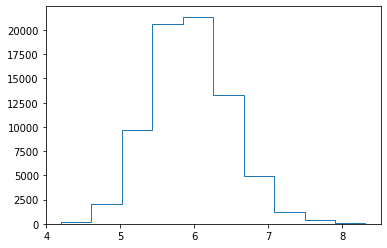

In [ ]:
plt.hist(data_test, histtype='step', log=False)

(array([  143.,  2073.,  9671., 20614., 21369., 13243.,  4940.,  1233.,
          377.,    53.]),
 array([13.94937078, 15.31638221, 16.68339364, 18.05040507, 19.4174165 ,
        20.78442793, 22.15143936, 23.51845078, 24.88546221, 26.25247364,
        27.61948507]),
 [<matplotlib.patches.Polygon at 0x7fa344d94c10>])

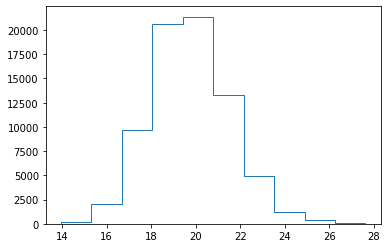

In [ ]:
plt.hist(data_log_2, histtype='step', log=False)

(array([  143.,  2073.,  9671., 20614., 21369., 13243.,  4940.,  1233.,
          377.,    53.]),
 array([ 9.66896703, 10.61650715, 11.56404726, 12.51158738, 13.4591275 ,
        14.40666762, 15.35420773, 16.30174785, 17.24928797, 18.19682809,
        19.14436821]),
 [<matplotlib.patches.Polygon at 0x7fa344d19e80>])

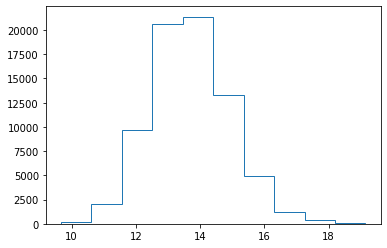

In [ ]:
plt.hist(data_log_e, histtype='step', log=False)

<Axes: ylabel='Density'>

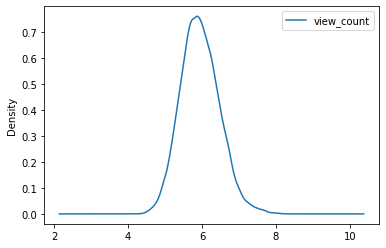

In [ ]:
np.isinf(data_log_10).any()
data_log_10.replace([np.inf, -np.inf], np.nan, inplace=True)
data_log_10
data_log_10.plot(kind='kde')

<Axes: ylabel='Density'>

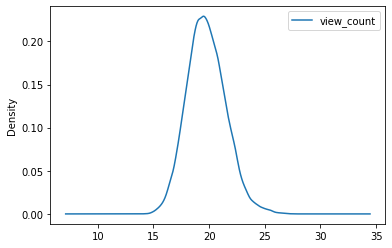

In [ ]:
np.isinf(data_log_10).any()
data_log_2.replace([np.inf, -np.inf], np.nan, inplace=True)
data_log_2
data_log_2.plot(kind='kde')

<Axes: ylabel='Density'>

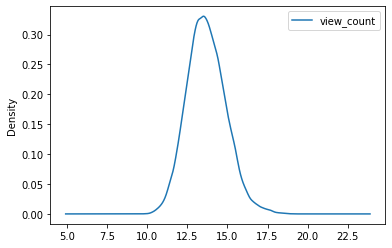

In [ ]:
np.isinf(data_log_10).any()
data_log_e.replace([np.inf, -np.inf], np.nan, inplace=True)
data_log_e
data_log_e.plot(kind='kde')

In [ ]:
data_log_10.describe()

,view_count
count,73716.000000
mean,5.949298
std,0.526506
min,4.199179
25%,5.584499
50%,5.921439
75%,6.288437
max,8.314293


In [ ]:
data_log_2.describe()

,view_count
count,73716.000000
mean,19.763139
std,1.749017
min,13.949371
25%,18.551305
50%,19.670595
75%,20.889735
max,27.619485


In [ ]:
data_log_e.describe()

,view_count
count,73716.000000
mean,13.698764
std,1.212326
min,9.668967
25%,12.858784
50%,13.634617
75%,14.479661
max,19.144368


###New dataset

In [ ]:
#importing csv with extracted features
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
drive.mount("/content/drive/")

path = '/content/drive/MyDrive/Data Mining Assignment/eng_data_title_date_features_latest.csv'
#import os
#os.chdir("/content/drive/")
#!ls

#Load the data
df_new=pd.read_csv(path, lineterminator='\n')

#View the data
df_new.head()

Mounted at /content/drive/


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratio_punctuation,start_with_digit,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1
0,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14T22:39:13Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,2020-11-21 00:00:00+00:00,[None],0,0,...,0.00,0,2020-11-14 22:39:13+00:00,14,5,319,4,[],0,1
1,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-15 00:00:00+00:00,[None],0,22585,...,0.00,0,2021-08-10 15:04:25+00:00,10,1,222,3,[],0,0
2,G1mi7J-VtHk,Committal Service for Her Majesty The Queen,2022-09-19T16:03:18Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-23 00:00:00+00:00,[None],0,0,...,0.00,0,2022-09-19 16:03:18+00:00,19,0,262,3,[],0,0
3,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25T01:40:31Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-29 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4420,...,0.12,0,2020-10-25 01:40:31+00:00,25,6,299,4,"['2 CHAINZ', 'DESI BANKS', 'LIONEL RICHIE ', '...",26,1
4,8fPKj1aySB4,The Queen’s children hold a Vigil in Edinburgh,2022-09-12T19:01:28Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-18 00:00:00+00:00,[None],0,0,...,0.00,0,2022-09-12 19:01:28+00:00,12,0,255,3,[],0,0


In [ ]:
view_count=df_new[df_new['view_count']==0]
#t.to_csv(r'/content/drive/MyDrive/Data Mining Assignment/view_count_0.csv', header=True)

In [ ]:
df_new=df_new[df_new['view_count']>0]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73716 entries, 20 to 73735
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             73716 non-null  object 
 1   title                73716 non-null  object 
 2   publishedAt          73716 non-null  object 
 3   channelId            73716 non-null  object 
 4   channelTitle         73716 non-null  object 
 5   categoryId           73716 non-null  int64  
 6   trending_date        73716 non-null  object 
 7   tags                 73716 non-null  object 
 8   view_count           73716 non-null  int64  
 9   likes                73716 non-null  int64  
 10  dislikes             73716 non-null  int64  
 11  comment_count        73716 non-null  int64  
 12  thumbnail_link       73716 non-null  object 
 13  comments_disabled    73716 non-null  bool   
 14  ratings_disabled     73716 non-null  bool   
 15  description          70426 non-null

In [ ]:
df_new.describe()

,categoryId,view_count,likes,dislikes,comment_count,trend_year,trend_month,#punctuation_title,#characters,#capital_words,...,contains_digit,ratio_stopwords,ratio_punctuation,start_with_digit,day,day_of_the_week,day_of_year,quarter,len_tags,weekday_0_weekend_1
count,73716.000000,7.371600e+04,7.371600e+04,7.371600e+04,7.371600e+04,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,...,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000
mean,19.991467,2.083206e+06,1.015794e+05,1.460860e+03,5.508920e+03,2021.382590,6.762670,2.458150,55.794224,1.529044,...,0.402965,0.171758,0.255308,0.030021,15.641842,2.984305,191.289069,2.596655,15.765071,0.284606
std,6.007093,5.304304e+06,2.688456e+05,8.890488e+03,3.116727e+04,0.816874,3.619783,1.903598,22.270300,2.342940,...,0.490497,0.156378,0.227275,0.170645,8.715804,2.019000,110.355904,1.157609,12.086920,0.451230
min,1.000000,1.581900e+04,0.000000e+00,0.000000e+00,0.000000e+00,2020.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,17.000000,3.841485e+05,1.242575e+04,0.000000e+00,6.830000e+02,2021.000000,3.000000,1.000000,39.000000,0.000000,...,0.000000,0.000000,0.120000,0.000000,8.000000,1.000000,88.000000,1.000000,5.000000,0.000000
50%,22.000000,8.345245e+05,3.319200e+04,4.800000e+01,1.757000e+03,2021.000000,7.000000,2.000000,53.000000,1.000000,...,0.000000,0.140000,0.220000,0.000000,16.000000,3.000000,209.000000,3.000000,16.000000,0.000000
75%,24.000000,1.942839e+06,9.016125e+04,7.460000e+02,4.386000e+03,2022.000000,10.000000,4.000000,72.000000,2.000000,...,1.000000,0.280000,0.360000,0.000000,23.000000,5.000000,287.000000,4.000000,24.000000,1.000000
max,29.000000,2.062023e+08,1.179567e+07,1.229004e+06,3.607577e+06,2023.000000,12.000000,31.000000,100.000000,20.000000,...,1.000000,1.000000,24.000000,1.000000,31.000000,6.000000,366.000000,4.000000,77.000000,1.000000


In [ ]:
df_new.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,start_with_digit,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,view_count_log
20,l0XET6OK64U,Where Are You Christmas (From Dr. Seuss' How T...,2020-11-19T10:37:00Z,UCiYz468hinIFtTokZ54pQ_g,Faith Hill - Topic,10,2020-12-04 00:00:00+00:00,Faith Hill|フェイスヒル|フェイス・ヒル|Hungover Christmas|W...,15819.0,74,...,0,2020-11-19 10:37:00+00:00,19,3,324,4,"['Faith Hill', 'フェイスヒル', 'フェイス・ヒル', 'Hungover ...",5,0,9.668967
21,KaEqvRET6uQ,19 January | Daily Current Affairs #22 | For -...,2022-01-19T02:25:01Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-01-19 00:00:00+00:00,19 January | Daily Current Affairs #22 | For -...,18027.0,1465,...,1,2022-01-19 02:25:01+00:00,19,2,19,1,"['19 January ', ' Daily Current Affairs #22 ',...",21,0,9.799626
22,KnFIFctIA14,11 November Daily Current Affairs #148 | For- ...,2022-11-11T01:33:53Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-11-11 00:00:00+00:00,11 November Daily Current Affairs #148 | For- ...,18966.0,2021,...,1,2022-11-11 01:33:53+00:00,11,4,315,4,"['11 November Daily Current Affairs #148 ', ' ...",19,0,9.850403
23,pwbsHhEpFwM,04 November Daily Current Affairs #141 | For- ...,2022-11-04T01:38:36Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-11-04 00:00:00+00:00,4 November Daily Current Affairs #141 | For- R...,19195.0,1982,...,1,2022-11-04 01:38:36+00:00,4,4,308,4,"['4 November Daily Current Affairs #141 ', ' F...",19,0,9.862405
24,BqSgczgyNdU,GUARANTEE || GURJAS SIDHU || TEASER,2020-10-13T06:03:07Z,UCHcDpS0TXITVs0ZrBSIsEsA,Lokdhun Punjabi,10,2020-10-13 00:00:00+00:00,punjabi music|latest punjabi songs 2020|New pu...,21406.0,1281,...,0,2020-10-13 06:03:07+00:00,13,1,287,4,"['punjabi music', 'latest punjabi songs 2020',...",7,0,9.971427


In [ ]:
#find missing values
df_new.isnull().sum()

video_id                  0
title                     0
publishedAt               0
channelId                 0
channelTitle              0
categoryId                0
trending_date             0
tags                      0
view_count                0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
description            3290
Category_Title           25
country                   0
trend_year                0
trend_month               0
language                  0
#punctuation_title        0
#characters               0
#capital_words            0
#lower_words              0
#words                    0
#stop_words               0
Avg_word_len              0
contains_digit            0
ratio_stopwords           0
ratio_punctuation         0
start_with_digit          0
ts_utc                    0
day                       0
day_of_the_week           0
day_of_year         

can also check for missing values using a for loop in case of more number of columns -> 
*`features for features in df_new.columns if df.new[features].isnull().sum()>0`*

In [ ]:
df_new.country.value_counts()

GB    22218
IN    19958
US    19343
CA    12197
Name: country, dtype: int64

(array([  143.,  2073.,  9671., 20614., 21369., 13243.,  4940.,  1233.,
          377.,    53.]),
 array([ 9.66896703, 10.61650715, 11.56404726, 12.51158738, 13.4591275 ,
        14.40666762, 15.35420773, 16.30174785, 17.24928797, 18.19682809,
        19.14436821]),
 [<matplotlib.patches.Polygon at 0x7ffa181aa520>])

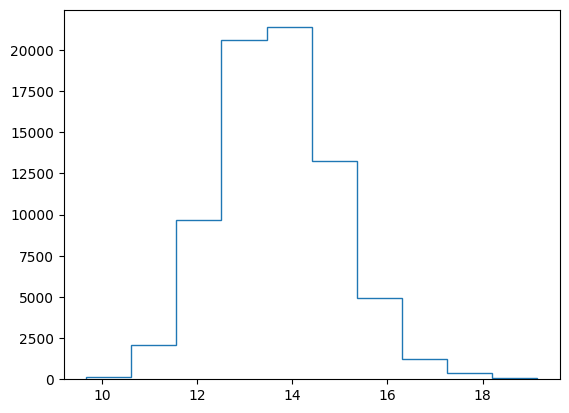

In [ ]:
df_new['view_count'] = df_new['view_count'].astype('float64')
df_new['view_count_log'] = np.log(df_new['view_count'])

# data_log_e = np.log(new_column)
# data_log_e.replace([np.inf, -np.inf], np.nan, inplace=True)

# Show the dataframe
plt.hist(df_new['view_count_log'], histtype='step', log=False)

In [ ]:
df_new['view_count_log'].describe()

count    73716.000000
mean        13.698764
std          1.212326
min          9.668967
25%         12.858784
50%         13.634617
75%         14.479661
max         19.144368
Name: view_count_log, dtype: float64

In [ ]:
temp = df_new.groupby('Category_Title')['view_count', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

<ipython-input-11-eec849ffc900>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = df_new.groupby('Category_Title')['view_count', 'likes'].apply(lambda x: x.astype(int).sum())


,view_count,likes
Category_Title,,
Entertainment,45191323236,2047584844
Music,22040124970,1253251113
Gaming,19503508885,1136899737
People & Blogs,18874901903,1065992088
Comedy,9744483393,627084973


In [ ]:
col = ['view_count_log', 'likes', 'dislikes', 'Category_Title']
corr = df_new[col].corr()
corr

,view_count_log,likes,dislikes
view_count_log,1.000000,0.536315,0.266597
likes,0.536315,1.000000,0.443921
dislikes,0.266597,0.443921,1.000000


In [ ]:
col = ['view_count_log', 'title', 'likes', 'dislikes']
corr = df_new[col].corr()
corr

,view_count_log,likes,dislikes
view_count_log,1.000000,0.536315,0.266597
likes,0.536315,1.000000,0.443921
dislikes,0.266597,0.443921,1.000000


In [ ]:
#punctuation_title       0
#characters              0
#capital_words           0
#lower_words             0
#words                   0
#stop_words

new_feature_correlation_matrix = ['view_count_log', '#punctuation_title', '#characters', '#capital_words','#lower_words','#words','#stop_words']
corr_1 = df_new[new_feature_correlation_matrix].corr()
corr_1

,view_count_log,#punctuation_title,#characters,#capital_words,#lower_words,#words,#stop_words
view_count_log,1.000000,-0.017582,-0.105544,-0.088361,-0.025960,-0.095454,-0.058177
#punctuation_title,-0.017582,1.000000,0.519595,0.104871,0.019319,0.481242,-0.107155
#characters,-0.105544,0.519595,1.000000,0.120524,0.299763,0.929279,0.226831
#capital_words,-0.088361,0.104871,0.120524,1.000000,-0.182130,0.169810,0.103918
#lower_words,-0.025960,0.019319,0.299763,-0.182130,1.000000,0.273855,0.419490
#words,-0.095454,0.481242,0.929279,0.169810,0.273855,1.000000,0.321016
#stop_words,-0.058177,-0.107155,0.226831,0.103918,0.419490,0.321016,1.000000


In [ ]:
df_new.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,start_with_digit,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,view_count_log
20,l0XET6OK64U,Where Are You Christmas (From Dr. Seuss' How T...,2020-11-19T10:37:00Z,UCiYz468hinIFtTokZ54pQ_g,Faith Hill - Topic,10,2020-12-04 00:00:00+00:00,Faith Hill|フェイスヒル|フェイス・ヒル|Hungover Christmas|W...,15819.0,74,...,0,2020-11-19 10:37:00+00:00,19,3,324,4,"['Faith Hill', 'フェイスヒル', 'フェイス・ヒル', 'Hungover ...",5,0,9.668967
21,KaEqvRET6uQ,19 January | Daily Current Affairs #22 | For -...,2022-01-19T02:25:01Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-01-19 00:00:00+00:00,19 January | Daily Current Affairs #22 | For -...,18027.0,1465,...,1,2022-01-19 02:25:01+00:00,19,2,19,1,"['19 January ', ' Daily Current Affairs #22 ',...",21,0,9.799626
22,KnFIFctIA14,11 November Daily Current Affairs #148 | For- ...,2022-11-11T01:33:53Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-11-11 00:00:00+00:00,11 November Daily Current Affairs #148 | For- ...,18966.0,2021,...,1,2022-11-11 01:33:53+00:00,11,4,315,4,"['11 November Daily Current Affairs #148 ', ' ...",19,0,9.850403
23,pwbsHhEpFwM,04 November Daily Current Affairs #141 | For- ...,2022-11-04T01:38:36Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-11-04 00:00:00+00:00,4 November Daily Current Affairs #141 | For- R...,19195.0,1982,...,1,2022-11-04 01:38:36+00:00,4,4,308,4,"['4 November Daily Current Affairs #141 ', ' F...",19,0,9.862405
24,BqSgczgyNdU,GUARANTEE || GURJAS SIDHU || TEASER,2020-10-13T06:03:07Z,UCHcDpS0TXITVs0ZrBSIsEsA,Lokdhun Punjabi,10,2020-10-13 00:00:00+00:00,punjabi music|latest punjabi songs 2020|New pu...,21406.0,1281,...,0,2020-10-13 06:03:07+00:00,13,1,287,4,"['punjabi music', 'latest punjabi songs 2020',...",7,0,9.971427


In [ ]:
df_new[df_new['view_count_log'].isna()]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,start_with_digit,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,view_count_log


In [ ]:
# Correlation matrix
new_feature_correlation_matrix = ['view_count_log', 'view_count', '#punctuation_title', '#characters', '#capital_words','#lower_words','#words','#stop_words'
, 'ratio_stopwords','Avg_word_len','day','day_of_the_week','day_of_year','quarter']
corr_1 = df_new[new_feature_correlation_matrix].corr()
corr_1

,view_count_log,view_count,#punctuation_title,#characters,#capital_words,#lower_words,#words,#stop_words,ratio_stopwords,Avg_word_len,day,day_of_the_week,day_of_year,quarter
view_count_log,1.000000,0.592163,-0.017582,-0.105544,-0.088361,-0.025960,-0.095454,-0.058177,-0.010806,0.003695,0.005952,0.032532,0.000727,0.000007
view_count,0.592163,1.000000,0.008379,-0.055841,-0.047274,0.005950,-0.061091,-0.044420,-0.024161,0.026968,0.000221,0.015187,-0.000128,-0.000537
#punctuation_title,-0.017582,0.008379,1.000000,0.519595,0.104871,0.019319,0.481242,-0.107155,-0.287702,0.039773,-0.006282,0.003364,0.006120,0.006496
#characters,-0.105544,-0.055841,0.519595,1.000000,0.120524,0.299763,0.929279,0.226831,-0.167123,0.011264,-0.000497,-0.003449,0.009567,0.007919
#capital_words,-0.088361,-0.047274,0.104871,0.120524,1.000000,-0.182130,0.169810,0.103918,0.038357,-0.132690,-0.001816,0.030276,0.010763,0.011354
#lower_words,-0.025960,0.005950,0.019319,0.299763,-0.182130,1.000000,0.273855,0.419490,0.265911,-0.014281,0.005522,-0.006372,-0.028412,-0.030555
#words,-0.095454,-0.061091,0.481242,0.929279,0.169810,0.273855,1.000000,0.321016,-0.085015,-0.305968,-0.001950,-0.007247,0.014573,0.013369
#stop_words,-0.058177,-0.044420,-0.107155,0.226831,0.103918,0.419490,0.321016,1.000000,0.835927,-0.295913,0.002443,-0.016198,-0.014924,-0.016739
ratio_stopwords,-0.010806,-0.024161,-0.287702,-0.167123,0.038357,0.265911,-0.085015,0.835927,1.000000,-0.257626,0.003021,-0.008067,-0.021118,-0.021660
Avg_word_len,0.003695,0.026968,0.039773,0.011264,-0.132690,-0.014281,-0.305968,-0.295913,-0.257626,1.000000,0.003374,0.006972,-0.015453,-0.016237


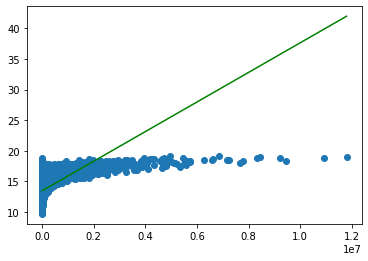

In [ ]:
import numpy as n
plt.scatter (df_new['likes'], df_new['view_count_log'])  
plt.plot(n.unique (df_new['likes']), n.poly1d (n. polyfit (df_new['likes'], df_new['view_count_log'], 1))(n. unique (df_new['likes'])), color = 'green') 


<ipython-input-20-0daf3ef29a3b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  capwords = sns.kdeplot(df_new['#capital_words'], shade=True, color="r")


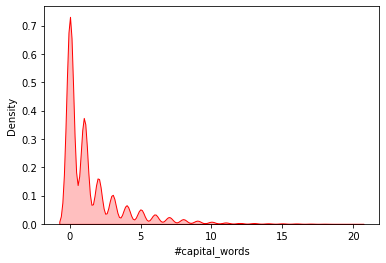

In [ ]:
capwords = sns.kdeplot(df_new['#capital_words'], shade=True, color="r")
plt.show()

<ipython-input-15-3e6ab7fc8d19>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  viewcount = sns.kdeplot(df_new['view_count'], shade=True, color="r")


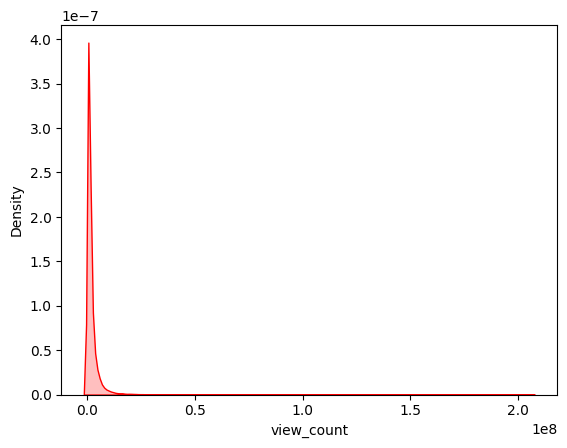

In [ ]:
viewcount = sns.kdeplot(df_new['view_count'], shade=True, color="r")
plt.show()

In [ ]:
viewcount.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/view_counts.png')

<ipython-input-8-deb5a2bb52b8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  viewcount_log = sns.kdeplot(df_new['view_count_log'], shade=True, color="r")


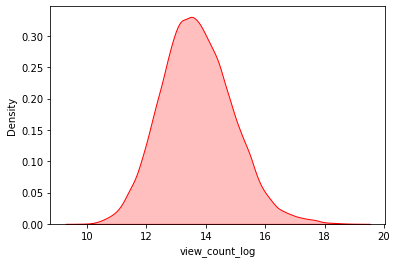

In [ ]:
viewcount_log = sns.kdeplot(df_new['view_count_log'], shade=True, color="r")
plt.show()

In [ ]:
viewcount_log.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/view_count_log.png')

In [ ]:
capwords.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/capital_words.png')

<Axes: ylabel='Density'>

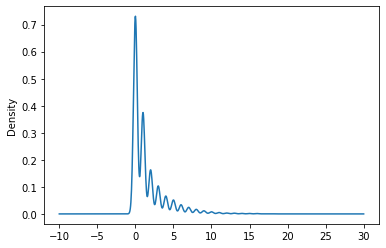

In [ ]:
df_new['#capital_words'].plot(kind='kde')

<ipython-input-23-3715a6b11d06>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  words = sns.kdeplot(df_new['#words'], shade=True, color="r")


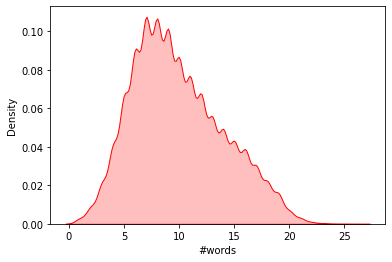

In [ ]:
words = sns.kdeplot(df_new['#words'], shade=True, color="r")
plt.show()

In [ ]:
words.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/words.png')

<Axes: ylabel='Density'>

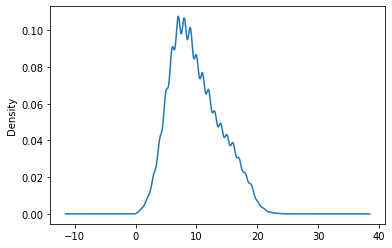

In [ ]:
df_new['#words'].plot(kind='kde')

<ipython-input-24-83a4f64d84e9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(df_new['start_with_digit'], shade=True, color="r")


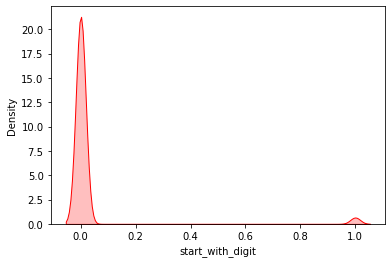

In [ ]:
# fig = sns.kdeplot(df_new['start_with_digit'], shade=True, color="r")
# plt.show() since it is a binary value

<ipython-input-28-fc146fc3cc28>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(df_new['#stop_words'], shade=True, color="r")


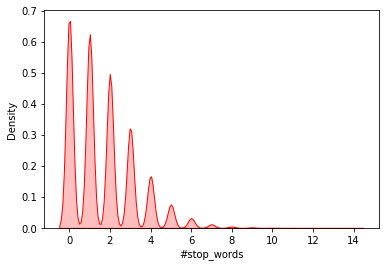

In [ ]:
fig = sns.kdeplot(df_new['#stop_words'], shade=True, color="r")
plt.show()

In [ ]:
df_new.head(40)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,start_with_digit,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,view_count_log
20,l0XET6OK64U,Where Are You Christmas (From Dr. Seuss' How T...,2020-11-19T10:37:00Z,UCiYz468hinIFtTokZ54pQ_g,Faith Hill - Topic,10,2020-12-04 00:00:00+00:00,Faith Hill|フェイスヒル|フェイス・ヒル|Hungover Christmas|W...,15819.0,74,...,0,2020-11-19 10:37:00+00:00,19,3,324,4,"['Faith Hill', 'フェイスヒル', 'フェイス・ヒル', 'Hungover ...",5,0,9.668967
21,KaEqvRET6uQ,19 January | Daily Current Affairs #22 | For -...,2022-01-19T02:25:01Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-01-19 00:00:00+00:00,19 January | Daily Current Affairs #22 | For -...,18027.0,1465,...,1,2022-01-19 02:25:01+00:00,19,2,19,1,"['19 January ', ' Daily Current Affairs #22 ',...",21,0,9.799626
22,KnFIFctIA14,11 November Daily Current Affairs #148 | For- ...,2022-11-11T01:33:53Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-11-11 00:00:00+00:00,11 November Daily Current Affairs #148 | For- ...,18966.0,2021,...,1,2022-11-11 01:33:53+00:00,11,4,315,4,"['11 November Daily Current Affairs #148 ', ' ...",19,0,9.850403
23,pwbsHhEpFwM,04 November Daily Current Affairs #141 | For- ...,2022-11-04T01:38:36Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-11-04 00:00:00+00:00,4 November Daily Current Affairs #141 | For- R...,19195.0,1982,...,1,2022-11-04 01:38:36+00:00,4,4,308,4,"['4 November Daily Current Affairs #141 ', ' F...",19,0,9.862405
24,BqSgczgyNdU,GUARANTEE || GURJAS SIDHU || TEASER,2020-10-13T06:03:07Z,UCHcDpS0TXITVs0ZrBSIsEsA,Lokdhun Punjabi,10,2020-10-13 00:00:00+00:00,punjabi music|latest punjabi songs 2020|New pu...,21406.0,1281,...,0,2020-10-13 06:03:07+00:00,13,1,287,4,"['punjabi music', 'latest punjabi songs 2020',...",7,0,9.971427
25,drTCzZCkqgw,WATCH: Coronavirus data briefing (21 September...,2020-09-21T10:25:06Z,UC8o7mIMg3mmO9-dx3e2iFgw,10 Downing Street,25,2020-09-25 00:00:00+00:00,[None],21963.0,172,...,0,2020-09-21 10:25:06+00:00,21,0,265,3,[],0,0,9.997114
26,PD2uwT-cHIA,Most Haunted Is Back! A New Episode Coming Soo...,2020-10-06T18:43:21Z,UCxG5eXRGg-S8JlO1yMeT8Xg,Most Haunted Official,24,2020-10-11 00:00:00+00:00,most haunted|yvette fielding|karl beattie|para...,22152.0,2125,...,0,2020-10-06 18:43:21+00:00,6,1,280,4,"['most haunted', 'yvette fielding', 'karl beat...",4,0,10.005683
27,GVaPrbcTRgM,Tuesday morning forecast 11/08/20,2020-08-10T16:38:20Z,UC40Tw2tFuMzK305mi7nj8rg,Met Office - Weather,25,2020-08-14 00:00:00+00:00,forecast|6179891359001,22902.0,346,...,0,2020-08-10 16:38:20+00:00,10,0,223,3,"['forecast', '6179891359001']",2,0,10.038980
28,hq7x4owOkNc,Eddie Hearn reviews Fight Camp: Xu Can vs Wood...,2021-08-01T00:24:33Z,UC7LReVje9aPB4B6XAsXX8WQ,Matchroom Boxing,17,2021-08-05 00:00:00+00:00,Eddie Hearn|Fight Camp|Conor Benn|Benn Granado...,23791.0,385,...,0,2021-08-01 00:24:33+00:00,1,6,213,3,"['Eddie Hearn', 'Fight Camp', 'Conor Benn', 'B...",16,1,10.077063
29,9UUnfmCqu0M,Reasoning short tricks in hindi for - Delhi Po...,2022-06-11T15:51:49Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2022-06-12 00:00:00+00:00,Reasoning short tricks in hindi for - Delhi Po...,24473.0,2732,...,0,2022-06-11 15:51:49+00:00,11,5,162,2,['Reasoning short tricks in hindi for - Delhi ...,25,1,10.105326


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73716 entries, 20 to 73735
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             73716 non-null  object 
 1   title                73716 non-null  object 
 2   publishedAt          73716 non-null  object 
 3   channelId            73716 non-null  object 
 4   channelTitle         73716 non-null  object 
 5   categoryId           73716 non-null  int64  
 6   trending_date        73716 non-null  object 
 7   tags                 73716 non-null  object 
 8   view_count           73716 non-null  float64
 9   likes                73716 non-null  int64  
 10  dislikes             73716 non-null  int64  
 11  comment_count        73716 non-null  int64  
 12  thumbnail_link       73716 non-null  object 
 13  comments_disabled    73716 non-null  bool   
 14  ratings_disabled     73716 non-null  bool   
 15  description          70426 non-null

In [ ]:
df_new.groupby('weekday_0_weekend_1')['video_id'].count()

weekday_0_weekend_1
0    52736
1    20980
Name: video_id, dtype: int64

In [ ]:
df_new.groupby('Category_Title')['video_id'].count().sort_values()

Category_Title
Nonprofits & Activism       15
Pets & Animals             259
Travel & Events            559
Autos & Vehicles          1419
Film & Animation          1746
Education                 1984
Howto & Style             2359
Science & Technology      2446
News & Politics           2724
Comedy                    3983
Music                     6914
People & Blogs            8453
Sports                   11300
Gaming                   11396
Entertainment            18134
Name: video_id, dtype: int64

In [ ]:
df_new.groupby('trending_date').count()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,tags,view_count,likes,dislikes,...,start_with_digit,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,view_count_log
trending_date,,,,,,,,,,,,,,,,,,,,,
2020-08-12 00:00:00+00:00,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
2020-08-13 00:00:00+00:00,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
2020-08-14 00:00:00+00:00,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
2020-08-15 00:00:00+00:00,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
2020-08-16 00:00:00+00:00,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01 00:00:00+00:00,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
2023-03-02 00:00:00+00:00,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
2023-03-03 00:00:00+00:00,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42


In [ ]:
df_new.groupby('day_of_the_week')['video_id'].count()

day_of_the_week
0    10602
1    10996
2    10910
3     9852
4    10390
5     9797
6    11189
Name: video_id, dtype: int64

In [ ]:
df_new.groupby('comments_disabled')['video_id'].count()

comments_disabled
False    72403
True      1333
Name: video_id, dtype: int64

In [ ]:
df_new.groupby('ratings_disabled').agg({'view_count': ['mean', 'min', 'max']})

view_count               
                          mean min        max
ratings_disabled                             
False             2.078082e+06   0  206202284
True              2.741140e+06   0   84994444

In [ ]:
df_new["trending_date"].max()

'2023-03-05 00:00:00+00:00'

In [ ]:
df_new["trending_date"].min()

'2020-08-12 00:00:00+00:00'

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<Axes: xlabel='trending_date', ylabel='view_count'>

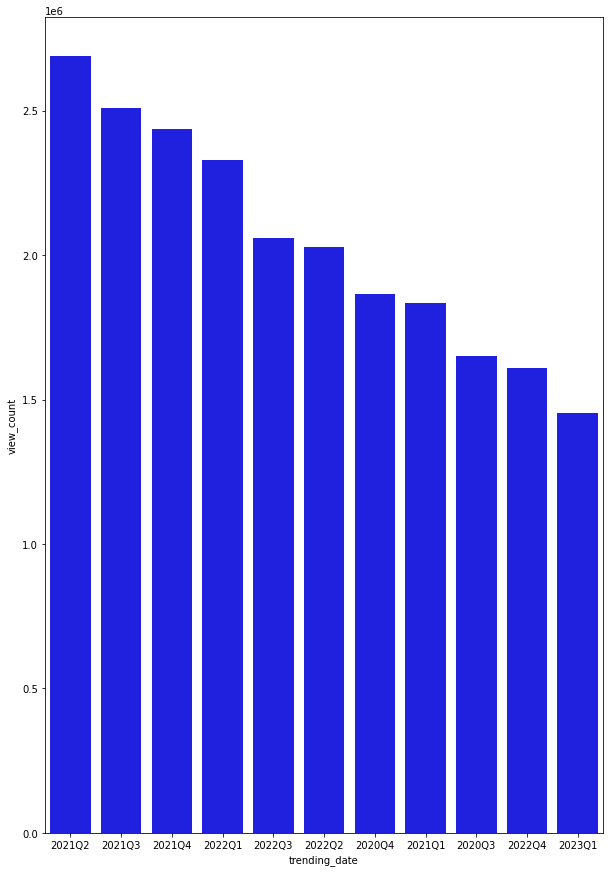

In [ ]:
df_new['trending_date'] = pd.to_datetime(df_new['trending_date'], errors='coerce')
trendingdate_mean = df_new.groupby(df_new['trending_date'].dt.to_period('Q'))['view_count'].agg('mean')

ratiodf1 = trendingdate_mean.sort_values(ascending=False).reset_index()
ratiodf1.columns = ['trending_date','view_count']

plt.subplots(figsize=(10, 15))

sns.barplot(x="trending_date", y="view_count", data=ratiodf1,label="trending date - view count", color="b")

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<Axes: xlabel='trending_date', ylabel='view_count_log'>

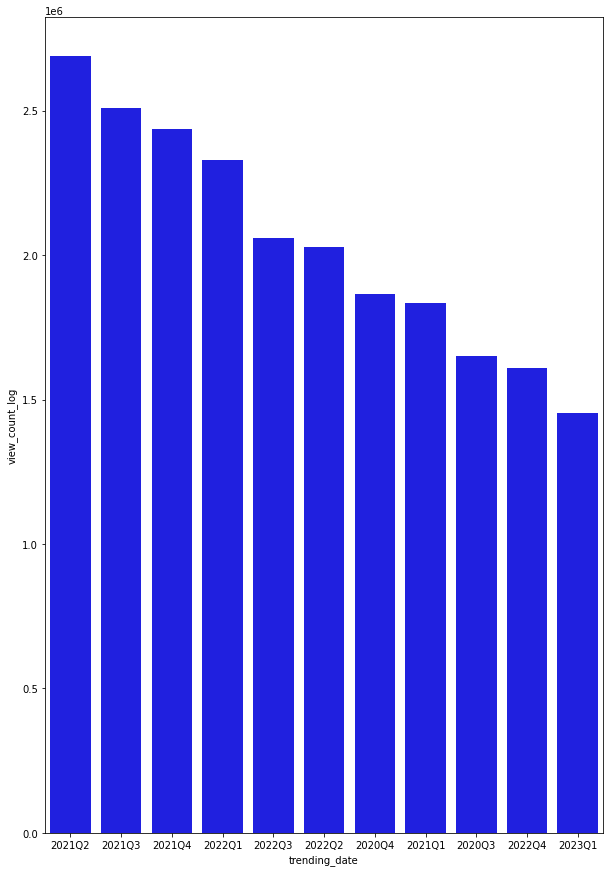

In [ ]:
df_new['trending_date'] = pd.to_datetime(df_new['trending_date'], errors='coerce')
trendingdate_viewcount = df_new.groupby(df_new['trending_date'].dt.to_period('Q'))['view_count_log'].agg('mean')

ratiodf2 = trendingdate_mean.sort_values(ascending=False).reset_index()
ratiodf2.columns = ['trending_date','view_count_log']

plt.subplots(figsize=(10, 15))

sns.barplot(x="trending_date", y="view_count_log", data=ratiodf2,label="trending date - view count log", color="b")

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73736 entries, 0 to 73735
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             73736 non-null  object 
 1   title                73736 non-null  object 
 2   publishedAt          73736 non-null  object 
 3   channelId            73736 non-null  object 
 4   channelTitle         73736 non-null  object 
 5   categoryId           73736 non-null  int64  
 6   trending_date        73736 non-null  object 
 7   tags                 73736 non-null  object 
 8   view_count           73736 non-null  int64  
 9   likes                73736 non-null  int64  
 10  dislikes             73736 non-null  int64  
 11  comment_count        73736 non-null  int64  
 12  thumbnail_link       73736 non-null  object 
 13  comments_disabled    73736 non-null  bool   
 14  ratings_disabled     73736 non-null  bool   
 15  description          70445 non-null 

<ipython-input-18-9d59bde6b7e4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  lenTag = sns.kdeplot(df_new['len_tags'], shade=True, color="r")


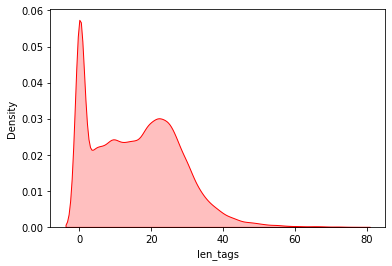

In [ ]:
lenTag = sns.kdeplot(df_new['len_tags'], shade=True, color="r")
plt.show()



In [ ]:
lenTag.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/Tag_Length.png')

**Correlation Matrix**

In [ ]:
new_feature_correlation_matrix = ['view_count_log', 'view_count','likes','dislikes','comment_count','comments_disabled','#punctuation_title', '#characters', '#capital_words','#lower_words','#words','#stop_words','Avg_word_len',
'ratio_stopwords','ratio_punctuation','len_tags']
corr_1 = df_new[new_feature_correlation_matrix].corr()
corr_1

,view_count_log,view_count,likes,dislikes,comment_count,comments_disabled,#punctuation_title,#characters,#capital_words,#lower_words,#words,#stop_words,Avg_word_len,ratio_stopwords,ratio_punctuation,len_tags
view_count_log,1.000000,0.592163,0.536315,0.266597,0.223195,-0.063149,-0.017582,-0.105544,-0.088361,-0.025960,-0.095454,-0.058177,0.003695,-0.010806,0.027623,-0.030905
view_count,0.592163,1.000000,0.822464,0.515745,0.365970,-0.007998,0.008379,-0.055841,-0.047274,0.005950,-0.061091,-0.044420,0.026968,-0.024161,0.041632,-0.046222
likes,0.536315,0.822464,1.000000,0.443921,0.499490,-0.031643,-0.007611,-0.105555,-0.028726,-0.000242,-0.109758,-0.027605,0.028412,0.012610,0.047893,-0.065877
dislikes,0.266597,0.515745,0.443921,1.000000,0.298738,0.004479,0.003002,-0.028746,-0.016722,-0.003003,-0.029393,-0.019032,0.010379,-0.009933,0.021544,-0.017851
comment_count,0.223195,0.365970,0.499490,0.298738,1.000000,-0.023867,0.002525,-0.049029,0.004300,-0.042311,-0.042707,-0.024484,-0.010575,-0.007446,0.025836,0.010367
comments_disabled,-0.063149,-0.007998,-0.031643,0.004479,-0.023867,1.000000,-0.007618,0.042662,-0.021452,0.064302,0.029083,0.026946,0.019610,-0.002754,-0.010476,-0.029079
#punctuation_title,-0.017582,0.008379,-0.007611,0.003002,0.002525,-0.007618,1.000000,0.519595,0.104871,0.019319,0.481242,-0.107155,0.039773,-0.287702,0.691720,0.106897
#characters,-0.105544,-0.055841,-0.105555,-0.028746,-0.049029,0.042662,0.519595,1.000000,0.120524,0.299763,0.929279,0.226831,0.011264,-0.167123,0.012545,0.167828
#capital_words,-0.088361,-0.047274,-0.028726,-0.016722,0.004300,-0.021452,0.104871,0.120524,1.000000,-0.182130,0.169810,0.103918,-0.132690,0.038357,0.011552,0.055989
#lower_words,-0.025960,0.005950,-0.000242,-0.003003,-0.042311,0.064302,0.019319,0.299763,-0.182130,1.000000,0.273855,0.419490,-0.014281,0.265911,-0.097145,-0.091369


In [ ]:
#converting correlation matix into a csv
corr_1.to_csv('/content/drive/MyDrive/Data Mining Assignment/correlation.csv')

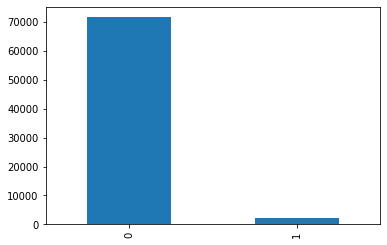

In [ ]:
swd = df_new['start_with_digit'].value_counts().plot.bar()

In [ ]:
df_new['start_with_digit'].value_counts()

0    71503
1     2213
Name: start_with_digit, dtype: int64

In [ ]:
swd.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/start_with_digit.png')

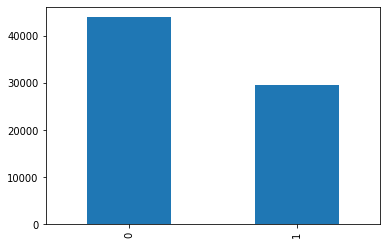

In [ ]:
cd = df_new['contains_digit'].value_counts().plot.bar()

In [ ]:
cd.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/contains_digit.png')

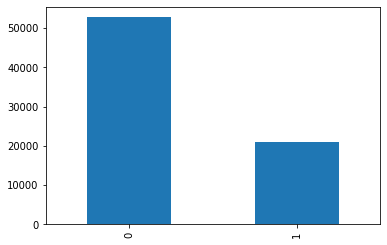

In [ ]:
wd = df_new['weekday_0_weekend_1'].value_counts().plot.bar()

In [ ]:
wd.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/weekday_0_weekend_1.png')

Text(0.5, 0, 'view_counts')

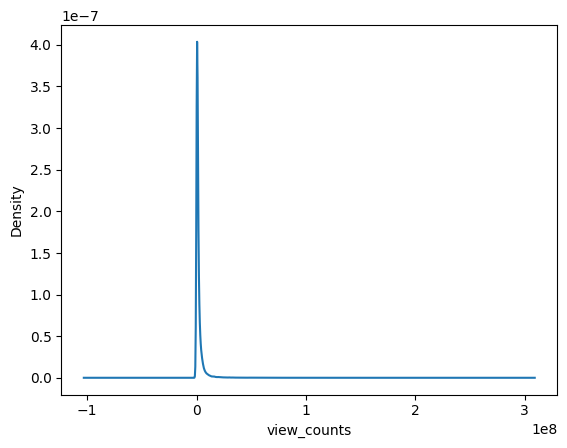

In [ ]:
vc = df_new['view_count'].plot(kind='kde' , grid=False)
plt.xlabel("view_counts")

In [ ]:
vc.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/vc.png')

Text(0.5, 0, 'view_count_log')

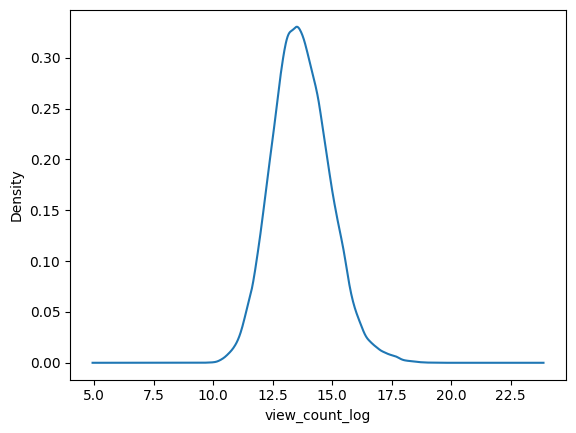

In [ ]:
vc_log = df_new['view_count_log'].plot(kind='kde' , grid=False)
plt.xlabel("view_count_log")

In [ ]:
vc_log.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Univariate Analysis/vc_log.png')

<Axes: >

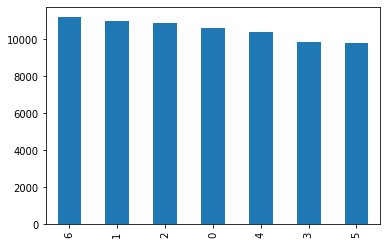

In [ ]:
df_new['day_of_the_week'].value_counts().plot.bar()

In [ ]:
df_new.describe()

,categoryId,view_count,likes,dislikes,comment_count,trend_year,trend_month,#punctuation_title,#characters,#capital_words,...,ratio_stopwords,ratio_punctuation,start_with_digit,day,day_of_the_week,day_of_year,quarter,len_tags,weekday_0_weekend_1,view_count_log
count,73716.000000,7.371600e+04,7.371600e+04,7.371600e+04,7.371600e+04,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,...,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000,73716.000000
mean,19.991467,2.083206e+06,1.015794e+05,1.460860e+03,5.508920e+03,2021.382590,6.762670,2.458150,55.794224,1.529044,...,0.171758,0.255308,0.030021,15.641842,2.984305,191.289069,2.596655,15.765071,0.284606,13.698764
std,6.007093,5.304304e+06,2.688456e+05,8.890488e+03,3.116727e+04,0.816874,3.619783,1.903598,22.270300,2.342940,...,0.156378,0.227275,0.170645,8.715804,2.019000,110.355904,1.157609,12.086920,0.451230,1.212326
min,1.000000,1.581900e+04,0.000000e+00,0.000000e+00,0.000000e+00,2020.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.668967
25%,17.000000,3.841485e+05,1.242575e+04,0.000000e+00,6.830000e+02,2021.000000,3.000000,1.000000,39.000000,0.000000,...,0.000000,0.120000,0.000000,8.000000,1.000000,88.000000,1.000000,5.000000,0.000000,12.858784
50%,22.000000,8.345245e+05,3.319200e+04,4.800000e+01,1.757000e+03,2021.000000,7.000000,2.000000,53.000000,1.000000,...,0.140000,0.220000,0.000000,16.000000,3.000000,209.000000,3.000000,16.000000,0.000000,13.634617
75%,24.000000,1.942839e+06,9.016125e+04,7.460000e+02,4.386000e+03,2022.000000,10.000000,4.000000,72.000000,2.000000,...,0.280000,0.360000,0.000000,23.000000,5.000000,287.000000,4.000000,24.000000,1.000000,14.479661
max,29.000000,2.062023e+08,1.179567e+07,1.229004e+06,3.607577e+06,2023.000000,12.000000,31.000000,100.000000,20.000000,...,1.000000,24.000000,1.000000,31.000000,6.000000,366.000000,4.000000,77.000000,1.000000,19.144368


1. minimum punctuation titles used are 0 and maximum are 31
2. min characters used are 1 and max are 100
3. min year is 2020 max is 2023
4. min 0 capital words and max is 20

<ipython-input-6-695bb208a44e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  pt = sns.kdeplot(df_new['#punctuation_title'], shade=True, color="r")


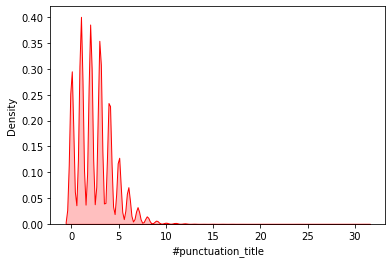

In [ ]:
pt = sns.kdeplot(df_new['#punctuation_title'], shade=True, color="r")
plt.show()

<Axes: >

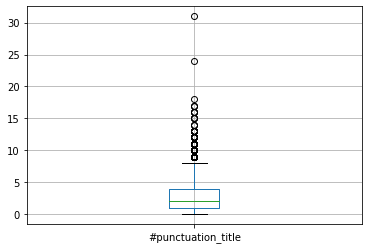

In [ ]:
df_new[['#punctuation_title']].boxplot()

<Axes: xlabel='day_of_the_week', ylabel='view_count'>

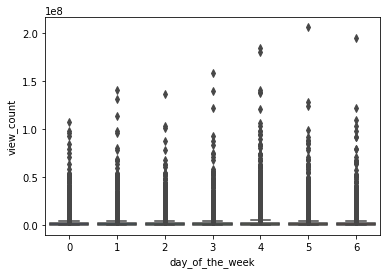

In [ ]:
sns.boxplot(x='day_of_the_week',y='view_count',data= df_new,palette='rainbow')

<Axes: xlabel='day_of_the_week', ylabel='view_count_log'>

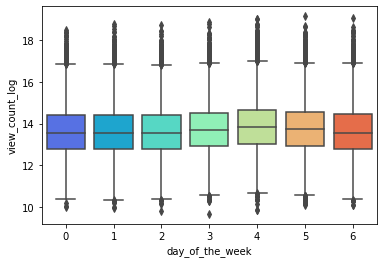

In [ ]:
sns.boxplot(x='day_of_the_week',y='view_count_log',data= df_new,palette='rainbow')

<Axes: xlabel='trend_month', ylabel='view_count_log'>

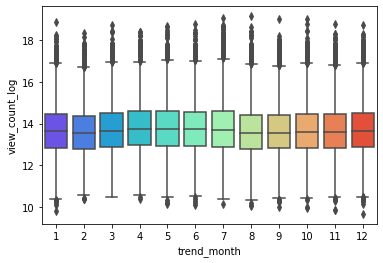

In [ ]:
tm = sns.boxplot(x='trend_month',y='view_count_log',data= df_new,palette='rainbow')
qt.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Bivariate Analysis/TrenMontVsViewLog.png')

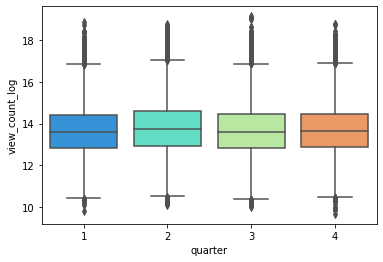

In [ ]:
qt = sns.boxplot(x='quarter',y='view_count_log',data= df_new,palette='rainbow')
qt.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Bivariate Analysis/QuarterVsViewLog.png')

In [ ]:
df_new.groupby('quarter').agg({'view_count': ['mean', 'min', 'max']})

view_count                      
                 mean      min          max
quarter                                    
1        1.935254e+06  18027.0  158477831.0
2        2.386486e+06  24473.0  141191928.0
3        2.099254e+06  21963.0  206202284.0
4        2.005982e+06  15819.0  140685439.0

In [ ]:
df_new.groupby('quarter')['view_count_log'].describe()

,count,mean,std,min,25%,50%,75%,max
quarter,,,,,,,,
1,18857.0,13.662962,1.194024,9.799626,12.827463,13.607317,14.434166,18.881125
2,13683.0,13.791951,1.233231,10.105326,12.941715,13.724936,14.579815,18.765631
3,19512.0,13.671830,1.227489,9.997114,12.824462,13.590558,14.447981,19.144368
4,21664.0,13.695330,1.198080,9.668967,12.869522,13.646836,14.479123,18.762037


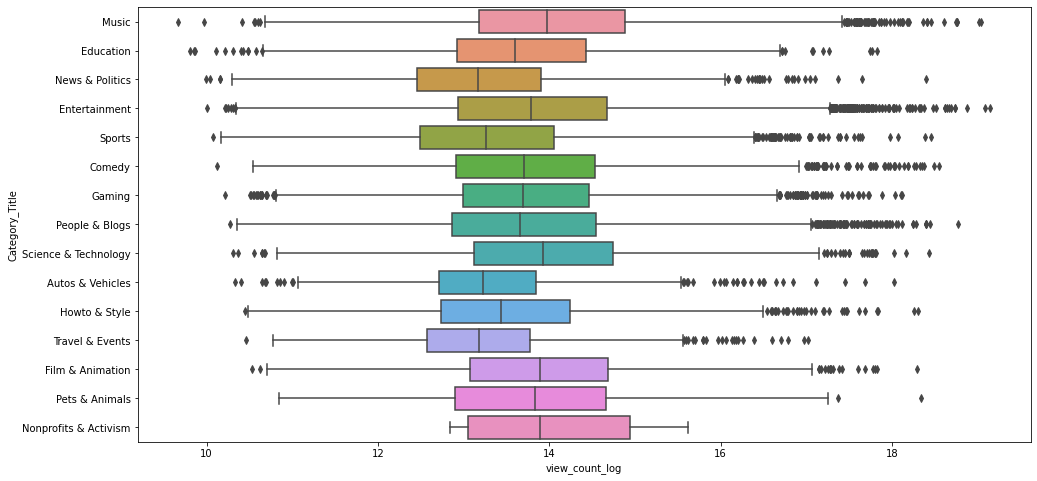

In [ ]:
plt.figure(figsize=(16,8))
cat = sns.boxplot(x='view_count_log',y='Category_Title',data= df_new)
cat.figure.savefig('/content/drive/MyDrive/Data Mining Assignment/Bivariate Analysis/categoryVsViews.png')


In [ ]:
df_new.groupby('Category_Title')['view_count_log'].describe().sort_values('count')

,count,mean,std,min,25%,50%,75%,max
Category_Title,,,,,,,,
Nonprofits & Activism,15.0,14.064390,1.008295,12.840724,13.056713,13.886799,14.943386,15.614802
Pets & Animals,259.0,13.868360,1.318901,10.840247,12.903289,13.836887,14.657458,18.343777
Travel & Events,559.0,13.261502,1.114342,10.456453,12.567442,13.182338,13.769520,17.021613
Autos & Vehicles,1419.0,13.294276,0.925547,10.328494,12.717812,13.231142,13.846211,18.027373
Film & Animation,1746.0,13.939865,1.216389,10.533216,13.078380,13.888863,14.688690,18.287872
Education,1984.0,13.635084,1.174464,9.799626,12.919463,13.604835,14.430549,17.828269
Howto & Style,2359.0,13.537528,1.166238,10.447003,12.737875,13.434963,14.244610,18.305000
Science & Technology,2446.0,13.950482,1.211395,10.305212,13.116412,13.921892,14.738652,18.427597
News & Politics,2724.0,13.213952,1.112228,9.997114,12.455052,13.170794,13.907079,18.402540


In [ ]:
df_new.view_count.describe()

count    7.371600e+04
mean     2.083206e+06
std      5.304304e+06
min      1.581900e+04
25%      3.841485e+05
50%      8.345245e+05
75%      1.942839e+06
max      2.062023e+08
Name: view_count, dtype: float64